# Importing

In [97]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("ticks")

In [223]:
S = np.genfromtxt("S.csv")
Sprime = np.genfromtxt("Sprime.csv")

delta = 0.01

n = len(S)

In [224]:
print(np.mean(S),np.mean(Sprime))

0.7894736842105263 0.5285714285714286


# Defining bounds

In [250]:
# Hoeff
hoeffding = lambda x: np.sqrt(np.log(2/(delta))/(2*len(x)))

ns = np.mean(S)


In [235]:
#Bersntein
def bern(x):
    return np.sqrt(2*sample_variance(x)/len(x) * np.log(4/delta)) + 7*np.log(4/delta)/(3*(len(x)-1))



In [226]:
def sample_variance(x):
    s = 0
    for i in range(len(x)):
        for j in range(i+1,len(x)):
            s += (x[i]-x[j])**2
        
    return s/(n*n-n)


In [236]:
#KL


# Stolen from my assignment 4
#  (if you were wondering why it is vectorized)
def binary_search(p_emp,_z,n,higher = True):
    z = np.log((n+1)/_z)/n
    def kl(p,q):
        left, right = np.zeros_like(p_emp), np.zeros_like(p_emp)
        
        p_not_one = np.where(p != 1)
        p_not_zero = np.where(p != 0)
        right[p_not_one] = (1-p[p_not_one])* np.log((1-p[p_not_one])/(1-q[p_not_one]))
        left[p_not_zero]  = np.nan_to_num(p[p_not_zero]*np.log(p[p_not_zero]/q[p_not_zero]))
            
        return left + right
    
    if higher:
        pmin = np.ones_like(p_emp)*p_emp
        pmax = np.ones_like(p_emp)
    else:
        pmin = np.zeros_like(p_emp)
        pmax = np.ones_like(p_emp)*p_emp
    
    for i in range(9999999999):
        p = (pmin + pmax)/2
        diff = kl(p_emp,p) - z
        close = np.isclose(diff,0)

        if np.all(close):
            return p
        
        if higher :
            pmin[diff < 0] = p[diff < 0]
            pmax[diff > 0] = p[diff > 0]
        else:
            pmin[diff > 0] = p[diff > 0]
            pmax[diff < 0] = p[diff < 0]
    return  p

KL_up = lambda x: binary_search(np.array([np.mean(x)]),0.05,len(x),True)[0]
KL_low = lambda x: binary_search(np.array([np.mean(x)]),0.05,len(x),False)[0]



# Results

In [246]:
h = (ns - hoeffding(S), ns + hoeffding(S))
b = (ns - bern(S),ns + bern(S))
k = (KL_low(S),KL_up(S))

print("Hoeff",h,"\nBern",b,"\nKL",k,"\n")
print("Widths\n",h[1]-h[0],"\n",b[1]-b[0],"\n",k[1]-k[0])

Hoeff (0.6859104726019621, 0.8930368958190905) 
Bern (0.6426661513734566, 0.936281217047596) 
KL (0.6708648487141257, 0.8820727749874717) 

Widths
 0.20712642321712837 
 0.2936150656741394 
 0.21120792627334606


In [247]:
nps = np.mean(Sprime)
hp = (nps - hoeffding(Sprime), nps + hoeffding(Sprime))
bp = (nps - bern(Sprime),nps + bern(Sprime))
kp = (KL_low(Sprime),KL_up(Sprime))

print("Hoeff",hp,"\nBern",bp,"\nKL",kp)
print("Widths\n",hp[1]-hp[0],"\n",bp[1]-bp[0],"\n",kp[1]-kp[0])

Hoeff (0.41625472745835324, 0.6408881296845039) 
Bern (0.36009483062032693, 0.6970480265225303) 
KL (0.38909123625074116, 0.6650942836488996)
Widths
 0.2246334022261507 
 0.33695319590220335 
 0.2760030473981584


# Plotting

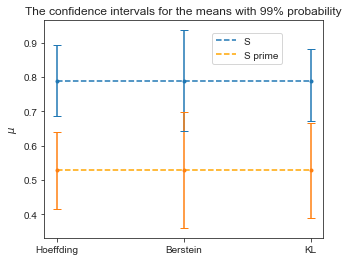

In [249]:
fig, ax = plt.subplots(figsize = (5,4))
ax.errorbar([0,1,2],[ns,ns,ns],yerr=[[hoeffding(S),bern(S),ns-KL_low(S)],[hoeffding(S),bern(S),KL_up(S)-ns]],fmt =".",capsize=4)

ax.errorbar([0,1,2],[nps,nps,nps],yerr=[[hoeffding(Sprime),bern(Sprime),nps-KL_low(Sprime)],[hoeffding(Sprime),bern(Sprime),KL_up(Sprime)-nps]],fmt =".",capsize=4)

ax.set_xticks([0,1,2])
ax.set_xticklabels(["Hoeffding","Berstein","KL"])

ax.hlines(ns,0,2,ls='--',label="S")
ax.hlines(nps,0,2,ls='--',color="orange",label="S prime")

ax.set_ylabel("$\mu$")
ax.set_title("The confidence intervals for the means with "+ str(int((1-delta)*100))+ "% probability")
plt.legend(loc = (0.6,0.8))
plt.show()